**<h2>EXPLORING THE REVIEWS DATASETS</h2>**

----
----

This data repository can be found [here](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html )

<br>
A pair of product categories have been chosen for this project.

*   Home and Kitchen
*   Grocery and Gourmet Food

The datasets considered for this project are the **5-core** dataset and the **metadata** of each category.

<br>

**<h4>Objectives :</h4>**
*   Perform univariate and/or bivariate analysis to extract insights from the data


## Functions used in EDA :

In [ ]:
# Function to filter nulls
def nulls(x) :
  if type(x)!=str :
    return False
  else :
    return True

# Function to join elements in a list as a string
def join_list_elem(elem_list) :
  try :
    return ' '.join(elem_list)
  except :
    return pd.NaT

# Function to remove a category from a list
def remove_category(catg_list,catg) :
  try :
    if len(catg_list)>1 :
      catg_list.remove(catg)
      return catg_list
    else :
      return catg_list
  except :
    return catg_list

# Function to draw a circle
def draw_circle(radius,color,edge_color) :
  centre_circle = plt.Circle((0, 0),radius, fc=color,edgecolor=edge_color)
  fig = plt.gcf()
  return fig.gca().add_artist(centre_circle)

# Function to get a bar's size in a bar chart
def bar_size(bars,vert) :
  if vert==True :
    return [bar.get_height() for bar in bars]
  else :
    return [bar.get_width() for bar in bars]

# Function to insert text in a bar chart
def print_txt(bars,values,vert) :
  for bar,value in zip(bars,values) :
    if vert==True :
      return plt.text(x=bar.get_x()+bar.get_width()/2, y=bar.get_height()+(bar.get_height()*0.01),
                      s=value,ha='center',va='baseline',fontweight='bold')
    else :
      return plt.text(x=bar.get_width()+(bar.get_width()*0.01),y=bar.get_y()+(bar.get_height()/2),
                      s=value,ha='left',va='center',fontweight='bold')

# Function to annotate on charts
def annotations(patches,values,vert=True,fontsize=11,fontweight='bold') :
  bars=[bar for bar in patches]
  sizes=bar_size(bars=bars,vert=vert)

  for bar,value in zip(bars,values) :
    if vert==True :
      plt.text(x=bar.get_x()+bar.get_width()/2, y=bar.get_height()+(bar.get_height()*0.01),
                      s=value,ha='center',va='baseline',fontweight=fontweight,fontsize=fontsize)
    else :
      plt.text(x=bar.get_width()+(bar.get_width()*0.0075),y=bar.get_y()+(bar.get_height()/2),
                      s=value,ha='left',va='center',fontweight=fontweight,fontsize=fontsize)

## Univariate Analysis :

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,702935.0,4.300816,1.106731,1.00,4.00,5.00,5.00,5.00
Positive_feedback,702935.0,3.082251,68.101240,0.00,0.00,0.00,1.00,52176.00
Total_feedback,702935.0,3.521603,69.249268,0.00,0.00,0.00,2.00,52861.00
helpfulness_ratio,702935.0,0.353898,0.451410,0.00,0.00,0.00,1.00,1.00
price,632353.0,40.594094,63.147179,0.01,11.99,20.99,39.99,999.99
no_pos,702840.0,5.907653,5.092089,0.00,3.00,5.00,7.00,217.00
no_neg,702840.0,2.600662,3.800259,0.00,0.00,1.00,3.00,200.00
total_words,702840.0,40.174106,44.749104,1.00,16.00,26.00,48.00,2316.00
polarity,702840.0,0.120993,0.134608,-1.00,0.04,0.11,0.20,1.00


#### reviewerID :





In [ ]:
print('There are %d customers in the dataset.' %data['reviewerID'].nunique())

print('\nThere are %d duplicate customer and product records in the dataset.' %data[['reviewerID','asin']].duplicated().sum())

There are 74426 customers in the dataset.

There are 0 duplicate customer and product records in the dataset.


In [ ]:
# Creating a dataframe of unique reviewerNames over the years for every reviewerID
groups=data.groupby('reviewerID')                                               # grouping data by reviewerID
customers={'reviewerID':[],'names':[]}                                          # dictionary to hold list of IDs and list of names

for id,group in groups :
  customers['reviewerID'].append(id)
  customers['names'].append(list(filter(nulls,set(group['reviewerName']))))     # filtering out nulls from the set of unique reviewerNames of each group, and appending the list

df_names=pd.DataFrame(customers)                                                # creating the dataframe from the dictionary
df_names['count']=df_names['names'].apply(lambda x : len(x))                    # adding a column for the length of the list of names for each reviewerID
df_names.set_index('reviewerID',inplace=True)                                   # setting IDs as index

display(df_names.head())

,names,count
reviewerID,,
A0002382258OFJJ2UYNTR,[PreacherGurl],1
A0010876CNE3ILIM9HV0,[JassyR],1
A00177463W0XWB16A9O05,[acethisplace],1
A00473363TJ8YSZ3YAGG9,[Thomas Rogers],1
A00593903MCE5GXTAGGNL,[Kenny L],1


In [ ]:
df_names['count'].value_counts()

1    74220
2      178
0       25
3        3
Name: count, dtype: int64

**There are 25 reviewerIDs with no reviewerName.**

In [ ]:
# Customers with the most purchases
purchases=data.groupby('reviewerID')['asin'].count().sort_values(ascending=False)
top_cust=purchases.head(10).sort_values()

names_list=[]
for i in top_cust.index :
  names_list.append(df_names.loc[i,'names'][0])
top_cust.index=names_list

top_cust

Mysterious Reviewer                240
csm                                244
L. Mountford                       251
Mike Tarrani "Jazz Drummer"        253
Crabigail Cassidy "Crabby Abby"    256
Margaret Picky                     284
Alex S                             285
Joanna Daneman                     329
C. Hill "CFH"                      333
Comdet                             368
Name: asin, dtype: int64

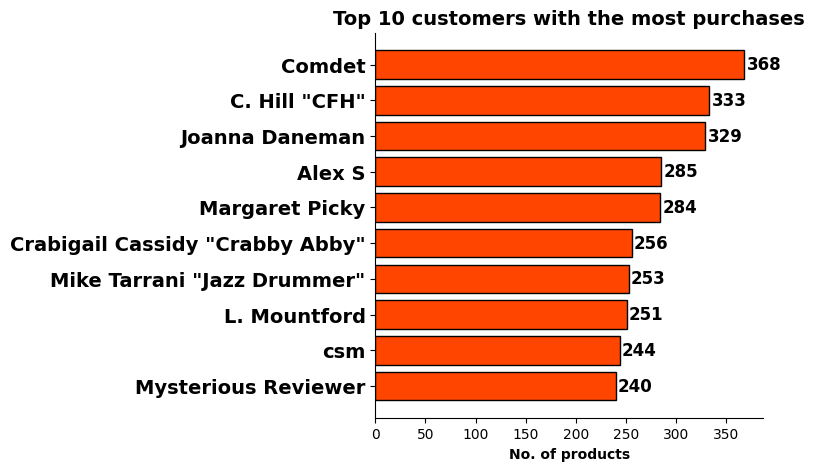

In [ ]:
# Bar chart
values=top_cust.values

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot()
patches=plt.barh(y=top_cust.index,width=top_cust.values,color='orangered',edgecolor='black')
annotations(patches,vert=False,values=values,fontsize=12,fontweight='bold')
plt.xlabel('No. of products',fontweight='bold')
plt.yticks(fontweight='bold',fontsize=14)
plt.title('Top %d customers with the most purchases' %len(top_cust),fontweight='bold',fontsize=14)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('Top10_cust',transparent=False,bbox_inches='tight')

In [ ]:
# Customers with the least purchases
bottom_cust=purchases.tail(10)

names_list=[]
for i in bottom_cust.index :
  names_list.append(df_names.loc[i,'names'][0])
bottom_cust.index=names_list

bottom_cust

D. G. Daniels                      5
David Wirtz                        5
musical chemist                    5
Leticia Porche                     5
J. G "Johnniee"                    5
Andrew                             5
Rick Demings "Douglas Hatteras"    5
TheBeth                            5
Dennis Berry                       5
BigJim6760                         5
Name: asin, dtype: int64

#### reviewerName :

In [ ]:
print('There are %d unique reviewer names in the dataset.' %data['reviewerName'].nunique())
print('\nThere are %d records in the dataset with no reviewer names.' %len(df_names[df_names['count'].eq(0)]))

There are 65777 unique reviewer names in the dataset.

There are 25 records in the dataset with no reviewer names.


In [ ]:
# Count of reviewerNames per reviewerID
names_repeat=df_names['count'].value_counts()
names_repeat

1    74220
2      178
0       25
3        3
Name: count, dtype: int64

In [ ]:
names=pd.Series({'No change':names_repeat.loc[1],
                 'More than\nonce':np.sum(names_repeat.loc[[2,3]])})
names

No change          74220
More than\nonce      181
dtype: int64

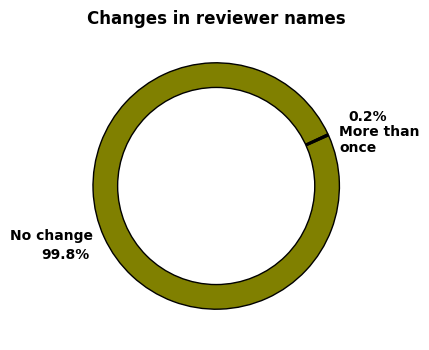

In [ ]:
# How many reviewerIDs have multiple reviewernames
positions=[(-1,-0.35),(1,0.5)]

fig=plt.figure(figsize=(4,4))
patches,texts,autotxt=plt.pie(names,labels=names.index,colors=['olive','black'],pctdistance=1.35,labeldistance=1.2,startangle=25,
                              autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},textprops={'color':'black','fontweight':'bold'})
draw_circle(radius=0.8,color='white',edge_color='black')

for i,t in zip(positions,texts) :
  t.set_color('black')
  t.set_verticalalignment('top')
  t.set_position(i)

plt.title('Changes in reviewer names',fontweight='bold')
plt.show()

fig.savefig('Name change',bbox_inches='tight')

#### asin :

In [ ]:
print('There are %d products in the dataset.' %data['asin'].nunique())

There are 36950 products in the dataset.


In [ ]:
# Most bought products
top_prod=data.groupby('asin')['asin'].count().sort_values(ascending=False).head(10).sort_values()

prod_names=[]
for i in top_prod.index :
  value=meta_data[meta_data['asin'].eq(i)]['title'].values[0]
  prod_names.append(value)

top_prod.index=pd.Index(prod_names).fillna('-')

top_prod

KRUPS F20342 Electric Spice and Coffee Grinder with Stainless Steel Blades, Black                             592
Hoover SteamVac Carpet Cleaner with Clean Surge, F5914900                                                     608
Eureka EasyClean Corded Hand-Held Vacuum, 71B                                                                 612
Contigo AUTOSEAL Stainless Steel Vacuum Insulated Tumbler, 16 Ounces, Blue (Discontinued by Manufacturer)     634
Pyrex Storage 10-Piece Set, Clear with Blue Lids                                                              656
Presto 04820 PopLite Hot Air Popper, White                                                                    662
illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12)                                            741
Pure Bar Organic Chocolate Brownie, Gluten Free, Raw, Vegan,  1.7-Ounce Bars (Pack of 12)                     742
EatSmart Precision Pro Digital Kitchen Scale, Silver                                    

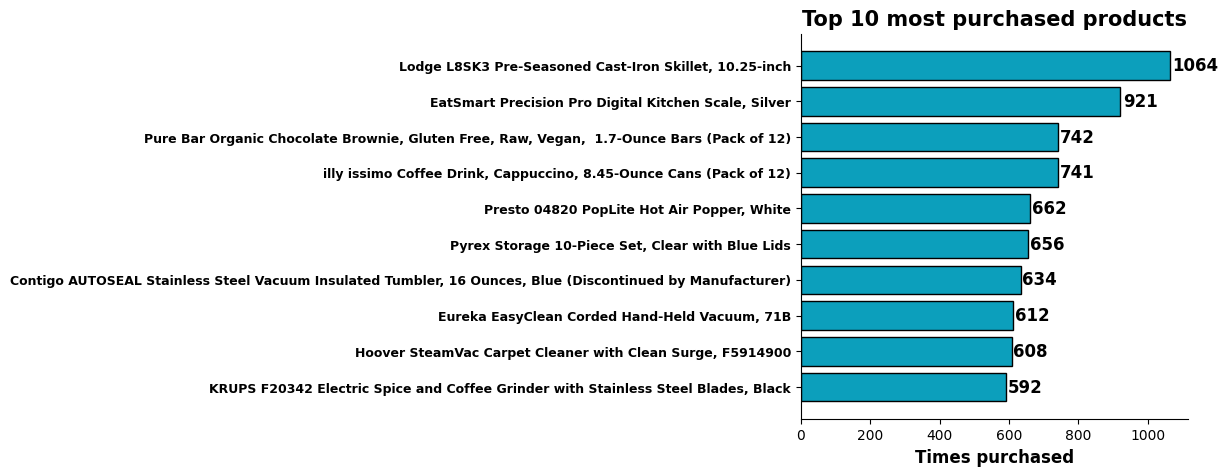

In [ ]:
# Bar chart
values=top_prod.values

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot()
patches=plt.barh(y=top_prod.index,width=top_prod.values,color='#0C9FBC',edgecolor='black')
annotations(patches,vert=False,values=values,fontsize=12,fontweight='bold')
plt.xlabel('Times purchased',fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=9)
plt.title('Top 10 most purchased products',fontweight='bold',fontsize=15)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('Top10 products',bbox_inches='tight')

In [ ]:
# Least bought product
bottom_prod=data.groupby('asin')['asin'].count().sort_values(ascending=True).head(5).sort_values()

prod_names=[]
for i in bottom_prod.index :
  value=meta_data[meta_data['asin'].eq(i)]['title'].values[0]
  prod_names.append(value)

bottom_prod.index=pd.Index(prod_names).fillna('-')

bottom_prod

Microplane 45011 Gourmet Series Ultra Coarse Wide Grater                                   5
-                                                                                          5
Cabcool 1201-2 Two-Single 120mm Kits with Thermal Control                                  5
Hamilton Beach 04294G Odor Removal Filter for Pets                                         5
Timothy's World Coffee, Kona Blend, K-Cups for Keurig Brewers, 24-Count Box (Pack of 2)    5
Name: asin, dtype: int64

#### brand :

In [ ]:
print('There are %d unique brands in the dataset.' %(data['brand'].nunique()))

There are 6948 unique brands in the dataset.


In [ ]:
# Value count of each brand
brands=data['brand'].value_counts()
brands

OXO                19779
Cuisinart          14726
Norpro             10386
Hamilton Beach      8347
KitchenAid          6583
                   ...  
Sushi Sonic            5
Copper Moon            5
LorAnn                 5
Paella Pans            5
Mercury Luggage        5
Name: brand, Length: 6948, dtype: int64

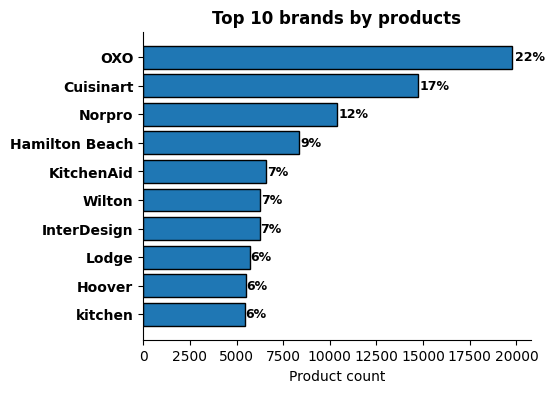

In [ ]:
# Top 10 brands
top10brands=brands[0:10].sort_values(ascending=True)
vals=[str(round(x))+'%' for x in np.round(100*top10brands.values/top10brands.sum())]

# Bar graph
fig=plt.figure(figsize=(5,4))
ax=fig.add_subplot()
patches=plt.barh(top10brands.index,top10brands.values,edgecolor='black')
annotations(patches,vert=False,values=vals,fontsize=9)
plt.xlabel('Product count')
plt.yticks(fontweight='bold')
plt.title('Top %d brands by products' %len(top10brands),fontweight='bold',fontsize=12)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('Top10 brands',bbox_inches='tight')

#### categories :

In [ ]:
# Removing 'Home & Kitchen' and 'Grocery & Gourmet Food' categories from category list
data['categories']=data['categories'].apply(lambda x : remove_category(catg_list=x,catg='Home & Kitchen'))

data['categories']=data['categories'].apply(lambda x : remove_category(catg_list=x,catg='Grocery & Gourmet Food'))

In [ ]:
# Grouping products by asin number and creating a dataframe for each products' list of categories
catgs=pd.DataFrame(data.groupby('asin')['categories'].head(1))
catgs['asin']=data.loc[catgs.index,'asin']
catgs.set_index('asin',inplace=True)

catgs.head()

,categories
asin,
0615391206,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."
0689027818,[Home & Kitchen]
0912696591,"[Kitchen & Dining, Bakeware, Baking & Cookie S..."
1223070743,"[Kitchen & Dining, Storage & Organization, Reu..."
1567120709,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."


In [ ]:
# Using multilabel binarizer to expand categories by the products
mlb=MultiLabelBinarizer()

catg2=pd.DataFrame(mlb.fit_transform(catgs['categories']),columns=mlb.classes_)
catg2.head()

,Accent Plates,Accessories,Acid Reflux Pillows,Active Dry Yeasts,Adjustable Chairs,Aeration Equipment,Air Conditioners & Accessories,Air Fresheners,Air Ionizers,Air Purifiers,...,Wine Racks,Wine Stoppers,Wine Stoppers & Pourers,Wing Corkscrews,Woks & Stir-Fry Pans,Worktables & Workstations,Wort Chillers,Wrapping & Packaging,Yogurt Makers,Zesters & Reamers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


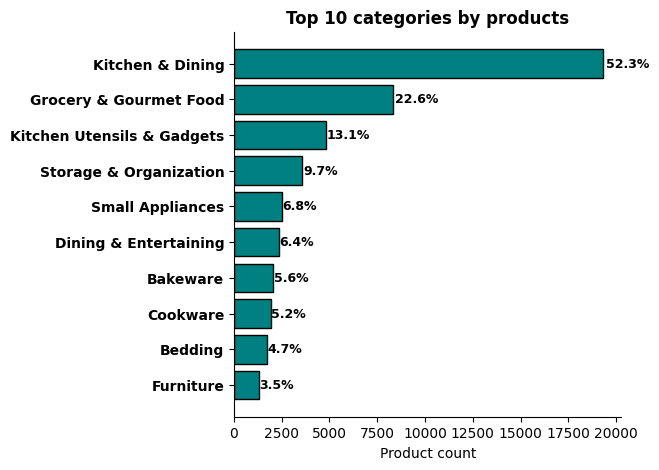

In [ ]:
# Sorting expanded categories by the number of products in each category
top_catgs=catg2.sum().sort_values(ascending=False)

# Selecting the top categories with high number of products
z=top_catgs[0:10].sort_values(ascending=True)
values=[str(x)+'%' for x in np.round(z.values/len(catg2)*100,1)]                # list of string to dispaly n chart

# Plotting top 10 categories by products
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot()
patches=plt.barh(z.index,width=z.values,edgecolor='black',color='teal')
annotations(patches,values=values,vert=False,fontsize=9)
plt.xlabel('Product count')
plt.yticks(fontweight='bold',fontsize=10)
plt.title('Top %d categories by products' %len(z),fontweight='bold',fontsize=12)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('top catgs',bbox_inches='tight')

In [ ]:
# Grouping reviewers and creating a dataframe with the list of product categories
cust_catgs=pd.DataFrame(data.groupby('reviewerID')['categories'].head(1))
cust_catgs['reviewerID']=data.loc[cust_catgs.index,'reviewerID']
cust_catgs.set_index('reviewerID',inplace=True)

cust_catgs.head()

,categories
reviewerID,
APYOBQE6M18AA,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."
A1JVQTAGHYOL7F,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."
A3UPYGJKZ0XTU4,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."
A2MHCTX43MIMDZ,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."
AHAI85T5C2DH3,"[Kitchen & Dining, Kitchen Utensils & Gadgets,..."


In [ ]:
# Using multilabel binarizer to expand categories per product
mlb=MultiLabelBinarizer()

cust_catg2=pd.DataFrame(mlb.fit_transform(cust_catgs['categories']),columns=mlb.classes_)
cust_catg2.head()

,Accessories,Acid Reflux Pillows,Active Dry Yeasts,Adjustable Chairs,Air Conditioners & Accessories,Air Fresheners,Air Ionizers,Air Purifiers,Airlocks,All Pans,...,Wine Making Starter Sets,Wine Pourers,Wine Racks,Wine Stoppers,Wine Stoppers & Pourers,Woks & Stir-Fry Pans,Worktables & Workstations,Wrapping & Packaging,Yogurt Makers,Zesters & Reamers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


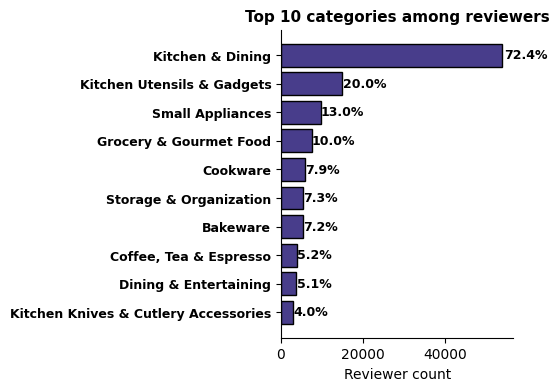

In [ ]:
# Sorting expanded categories by the number of products in each category
top_cust_catgs=cust_catg2.sum().sort_values(ascending=False)

# Top categories by reviewer count
z=top_cust_catgs[0:10].sort_values(ascending=True)
values=[str(x)+'%' for x in np.round(z.values/len(cust_catg2)*100,1)]           # list of string to display on bar chart

# Plotting the bar chart
fig=plt.figure(figsize=(3,4))
ax=fig.add_subplot()
patches=plt.barh(z.index,width=z.values,edgecolor='black',color='darkslateblue')
annotations(patches,values=values,vert=False,fontsize=9)
plt.xlabel('Reviewer count')
plt.yticks(fontweight='bold',fontsize=9)
plt.title('Top %d categories among reviewers' %len(z),fontweight='bold',fontsize=11)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('topcatg_revs',bbox_inches='tight')

#### price :

In [ ]:
# Grouping products and taking mean of their prices
prices=data.groupby('asin')['price'].mean()
prices

asin
0615391206     17.29
0689027818    473.68
0912696591     14.26
1223070743      2.95
1567120709     27.95
               ...  
B00L8HA5L8      9.99
B00L9KOZBK     24.00
B00LAI4UYS     27.99
B00LB18EKK     14.95
B00LBFUU12      8.99
Name: price, Length: 36950, dtype: float64

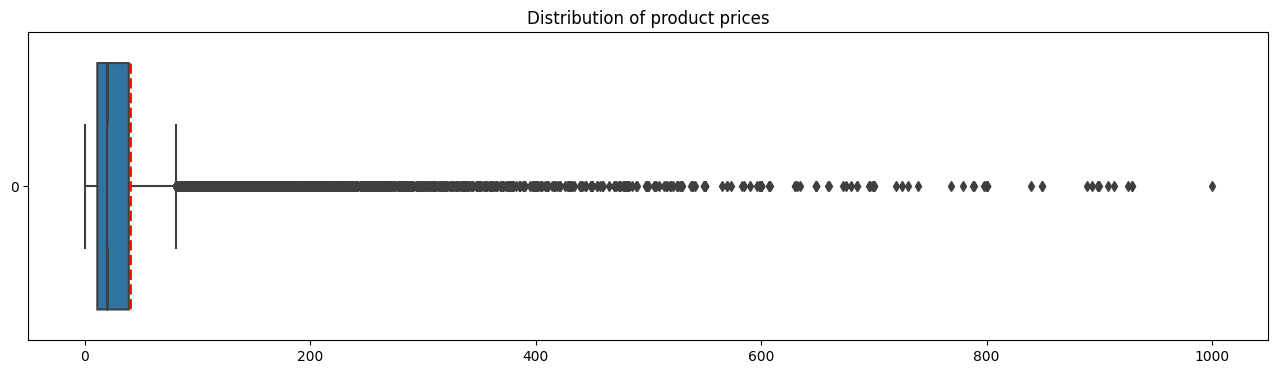

In [ ]:
# Box plot of product prices
plt.figure(figsize=(16,4))
sns.boxplot(prices,showmeans=True,meanline=True,orient='h',notch=True,
            meanprops={'color':'red','linestyle':'--','linewidth':2})
plt.title('Distribution of product prices')
plt.show()

#### reviewText :
*   language
*   cleanText
*   total_words
*   pos_words
*   neg_words



In [ ]:
print('There are %d empty reviews in the dataset.' %data['reviewText'].isnull().sum())
print('\nThere are %d \'\' reviews in the dataset.' %data[data['reviewText'].eq('')]['reviewText'].count())

There are 0 empty reviews in the dataset.

There are 0 '' reviews in the dataset.


In [ ]:
# Non English language reviews in the data
lang=data['language'].value_counts()
lang

English       702845
Spanish           77
Portuguese         6
Unknown            5
German             2
Name: language, dtype: int64

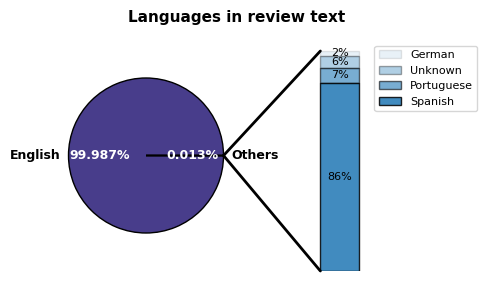

In [ ]:
eng=pd.Series([lang.iloc[0],lang.iloc[1:].sum()],index=['English','Others'])
non_eng=lang.drop('English',axis=0)

# Pie with bar graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = eng.values/eng.sum()
labels = eng.index
# rotate so that first wedge is split by the x-axis
angle = -180 * eng[1]
wedges,txt,auto_txt = ax1.pie(overall_ratios, autopct='%1.3f%%', startangle=angle,labels=labels,
                              wedgeprops={'edgecolor':'black'},colors=['darkslateblue','black'],
                              textprops={'color':'white','fontweight':'bold','fontsize':9})
for t,p in zip(txt,autotxt) :
  t.set_color('black')

# bar chart parameters
lang_ratios = non_eng.values/non_eng.sum()
lang_labels = non_eng.index
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(lang_ratios, lang_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,edgecolor='black',
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center',fontsize=8)

#ax2.set_title('Other languages')
ax2.legend(bbox_to_anchor=(0.65,1),fontsize=8)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(lang_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.suptitle('Languages in review text',fontweight='bold',fontsize=11)
plt.show()

fig.savefig('langs',bbox_inches='tight')

In [ ]:
# Checking the English reviews for null reviews after cleaning the text
eng_null=data[data['language'].eq('English') & data['cleanText'].isnull()==True]

print('There are %d reviews in english which have been completely cleaned during text preprocessing.\n' %len(eng_null))
display(eng_null)

There are 5 reviews in english which have been completely cleaned during text preprocessing.



,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,language,cleanText,pos_words,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday
481082,A3LP6IW5UVR2RF,B007TUQF9O,Jeffrey D Binder,Very well made Well Made,5.0,2014-07-12,0,0,NaN,14.95,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Saturday
537966,A2F0POG1KOAP5J,B00FF75XG4,"Jorge Gomez ""jl""",Well made Well Made,5.0,2014-07-03,0,0,NaN,9.95,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Thursday
563382,A1GQNWF4YAGPEP,B000EEWZAU,B. Matthews,NOT Crosspacked,1.0,2013-01-18,6,9,0.666667,37.95,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Friday
581790,A3N3TRD4YGTKUY,B000NMCEJK,"David J. Morse ""Darkgoth""","whats there to say, Mmmmmmmm Mmmmmmm",5.0,2014-07-09,0,0,NaN,9.72,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Wednesday
588258,A2GJ8E2JIJW08E,B0010UOGWM,"G. Staffiere ""Commercial & Graphic Artist""",Ok Ok,3.0,2014-07-02,0,0,NaN,4.49,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Wednesday


In [ ]:
# Droping these records
data.drop(eng_null.index,axis=0,inplace=True)

display(data[data['language'].eq('English')].isnull().sum())

reviewerID                0
asin                      0
reviewerName           6486
reviewText                0
overall                   0
reviewTime                0
Positive_feedback         0
Total_feedback            0
helpfulness_ratio    389410
price                 70579
language                  0
cleanText                 0
pos_words                 0
neg_words                 0
no_pos                    0
no_neg                    0
total_words               0
polarity                  0
sentiment                 0
weekday                   0
dtype: int64

In [ ]:
# 5 point description of length of cleaned review text for each sentiment
subset=data[data['language'].eq('English')]
groups=subset.groupby('sentiment')
senti=list(subset.sentiment.unique())
dict2={}

for i in senti :
  g = groups.get_group(i)
  dict2[i]=g['total_words'].describe()

text_len_desc=pd.DataFrame(dict2)
text_len_desc

,Positive,Neutral,Negative,Highly Negative,Highly Positive
count,565981.000000,50893.000000,85373.000000,149.000000,444.000000
mean,39.732503,30.834771,48.901140,6.832215,6.752252
std,44.373725,30.490466,52.349311,3.927386,3.874075
min,2.000000,1.000000,3.000000,1.000000,1.000000
25%,16.000000,14.000000,19.000000,4.000000,4.000000
50%,26.000000,21.000000,33.000000,6.000000,7.000000
75%,47.000000,37.000000,59.000000,10.000000,9.250000
max,2293.000000,715.000000,2316.000000,25.000000,46.000000


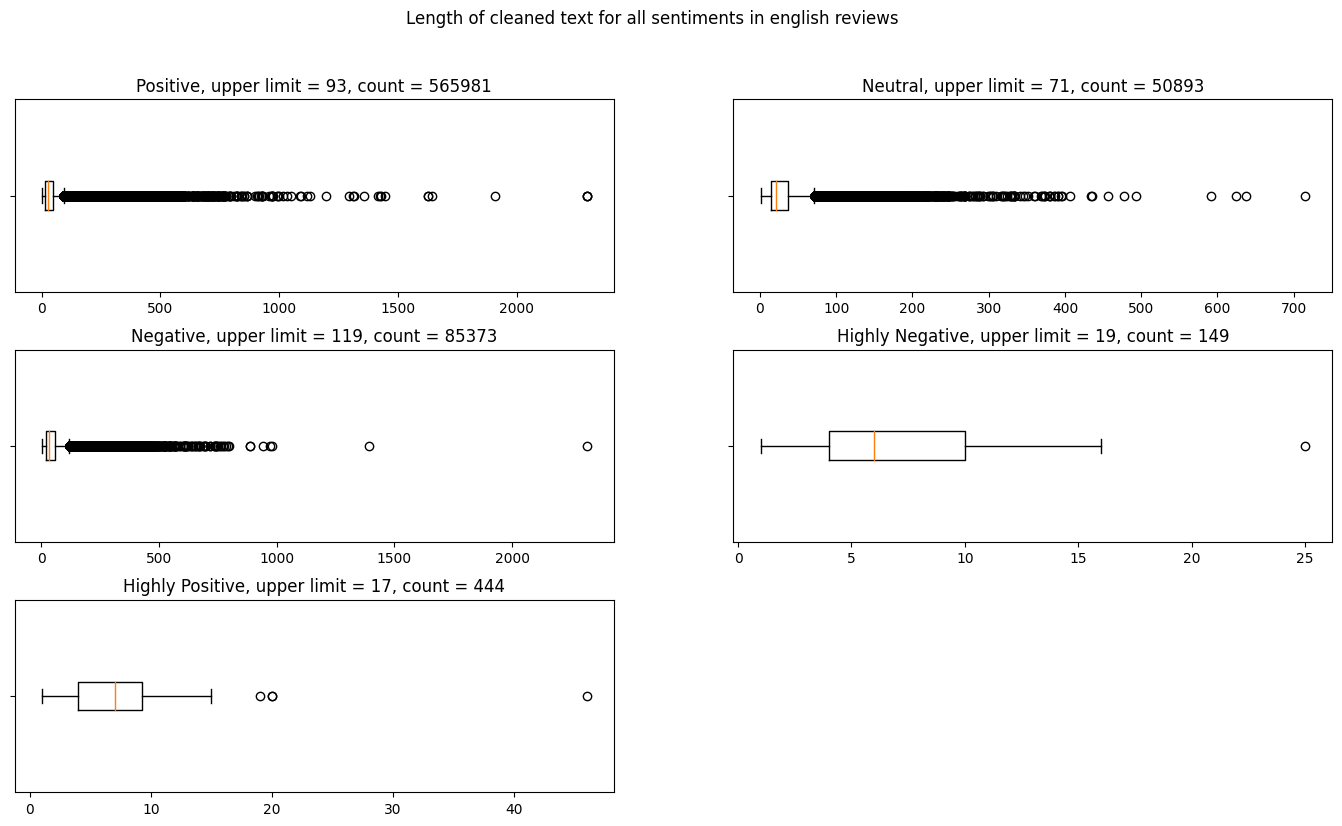

In [ ]:
# Boxplots of the length of cleaned review text for each sentiment
text_outliers={}

R,C,P=3,2,1
plt.subplots(R,C,figsize=(17,9),gridspec_kw={'height_ratios':[3]*3})
plt.subplots_adjust(hspace=0.3)

for senti in subset['sentiment'].unique() :
  iqr=text_len_desc.loc['75%',senti]-text_len_desc.loc['25%',senti]             # IQR = Q3-Q1
  limit=int(text_len_desc.loc['75%',senti]+(1.5*iqr))                           # upper limit = Q3+(1.5*IQR)

  x=subset[subset['sentiment'].eq(senti)]# & subset['len_txt'].gt(limit)]
  text_outliers[senti]=len(x)

  plt.subplot(R,C,P)
  plt.boxplot(x['total_words'],vert=False)
  plt.yticks(ticks=[1],labels='')
  plt.title(senti+', upper limit = '+str(limit)+', count = '+str(len(x)))
  P+=1

plt.subplot(R,C,P)
plt.axis('off')
plt.suptitle('Length of cleaned text for all sentiments in english reviews')
plt.show()

In [ ]:
# Creating series by joining list elements of each record into a string per record
strings_pos=data['pos_words'].apply(join_list_elem).fillna('')
strings_neg=data['neg_words'].apply(join_list_elem).fillna('')

# Joining strings of each record in the created series
words_positive=' '.join(x for x in strings_pos)
words_negative=' '.join(x for x in strings_neg)

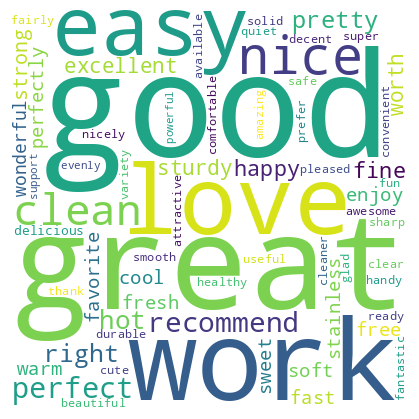

In [ ]:
# Creating wordcloud for positive words
wordcloud = WordCloud(width = 400, height = 400,stopwords=STOPWORDS,collocations=False,
                      background_color ='white',min_font_size = 10).generate(words_positive)

# Plot the WordCloud image of positive words
fig=plt.figure(figsize = (5, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fig.savefig('good_cloud',bbox_inches='tight')

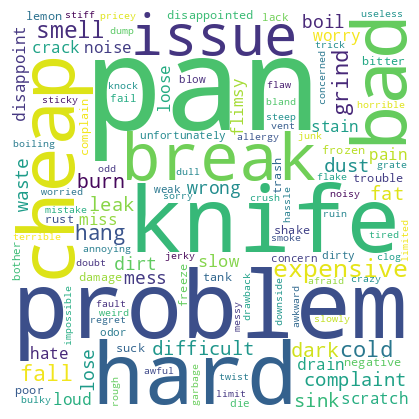

In [ ]:
# Creating wordcloud for negative words
wordcloud = WordCloud(width = 400, height = 400,stopwords=STOPWORDS,collocations=False,
                      background_color ='white',min_font_size = 10).generate(words_negative)

# Plot the WordCloud image of negative words
fig=plt.figure(figsize = (5,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fig.savefig('bad_cloud',bbox_inches='tight')

#### polarity :

*   sentiment



In [ ]:
senti=data['sentiment'].value_counts()
senti

Neutral     370559
Positive    247059
Negative     85317
Name: sentiment, dtype: int64

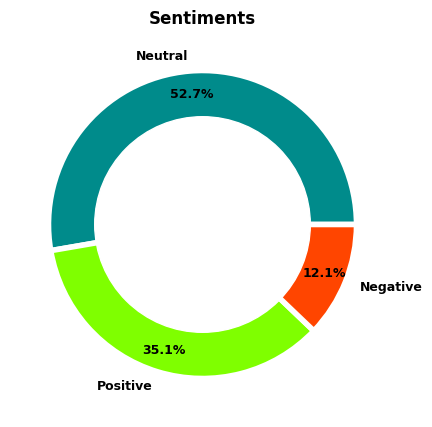

In [ ]:
# Pie chart for sentiments
fig=plt.figure(figsize=(5,5))
wedges,txt,autotxt=plt.pie(senti,autopct='%1.1f%%',labels=senti.index,pctdistance=0.85,colors=['darkcyan','chartreuse','orangered'],
                           wedgeprops={'edgecolor':'white','linewidth':4},textprops={'fontweight':'bold','fontsize':9})
draw_circle(radius=0.7,color='white',edge_color='white')

plt.title('Sentiments',fontweight='bold',fontsize=12)
plt.show()

fig.savefig('sentiments',bbox_inches='tight')

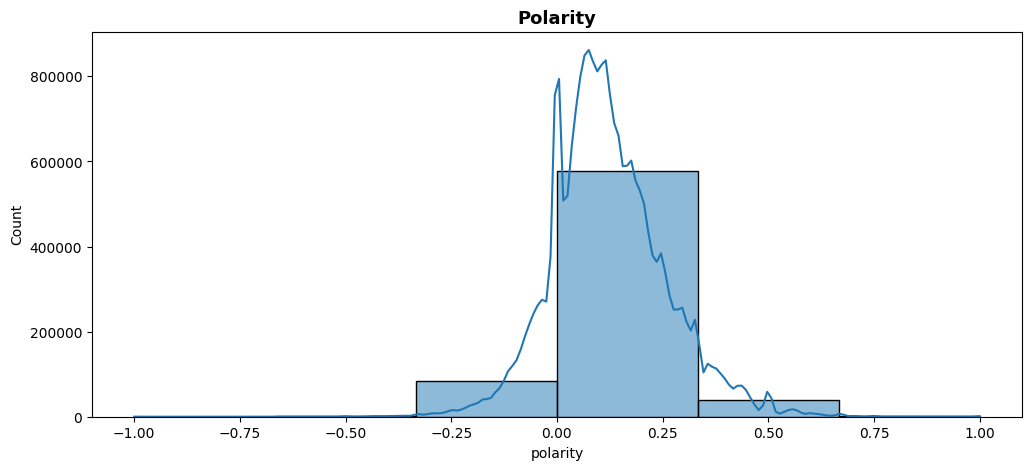

In [ ]:
# Histogram for sentiment scores
plt.figure(figsize=(12,5))
sns.histplot(data['polarity'],bins=6,kde=True)
plt.title('Polarity',fontweight='bold',fontsize=13)
plt.show()

#### overall :



In [ ]:
# 5 point description of the overall ratings column
rtgs=data['overall'].astype(int).value_counts()
rtgs

5    437142
4    138105
3     62573
1     32885
2     32230
Name: overall, dtype: int64

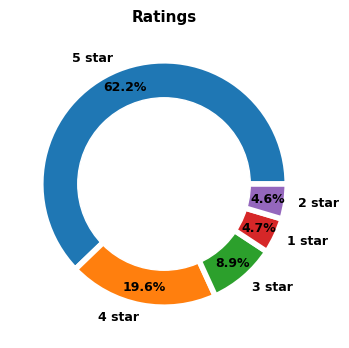

In [ ]:
# Pie chart for ratings
labels=[str(x)+' star' for x in rtgs.index]

fig=plt.figure(figsize=(4,4))
_,txt,_=plt.pie(rtgs,autopct='%1.1f%%',labels=labels,pctdistance=0.85,labeldistance=1.1,
                wedgeprops={'edgecolor':'white','linewidth':4},textprops={'fontweight':'bold','fontsize':9})
draw_circle(radius=0.7,color='white',edge_color='white')
#for i in range(len(txt)) :
#  plt.annotate(labels[i],)

plt.title('Ratings',fontweight='bold',fontsize=11)
plt.show()

fig.savefig('ratgs',bbox_inches='tight')

Using Chi squre test of independence to see if the ratings (overall) column is dependent on the polarity scores.
<br>
<br>

<h3>Hypothesis Testing :</h3>

*   H0 : Ratings are independent of the sentiment of the review text
*   H1 : Ratings are dependent on the sentiment of the review text


In [ ]:
ratgs=pd.crosstab(data['overall'],data['sentiment'])
ratgs

sentiment,Negative,Neutral,Positive
overall,,,
1.0,18051,13387,1447
2.0,11827,17802,2601
3.0,14106,38959,9508
4.0,14029,82767,41309
5.0,27304,217644,192194


In [ ]:
# Level of significance at 10%
alpha=0.1

# Calculating the test statistics and p value
statistic,pval2,dof,expected=sts.chi2_contingency(ratgs)
print('Test statistics :',statistic,
      '\np value :',pval2,
      '\nDegrees of freedom :',dof)

# Using p value to test the hypothesis
if pval2 > alpha :
  print('\nAccept the null hypothesis and reject the alternative hypothesis.')
  print('Therefore, the ratings are independent of the polarity score from the reviews.')
else :
  print('\nReject the null hypothesis and accept the alternative hypothesis.')
  print('Therefore, the ratings are dependent on the polarity score from the reviews.')

Test statistics : 121570.03913544852 
p value : 0.0 
Degrees of freedom : 8

Reject the null hypothesis and accept the alternative hypothesis.
Therefore, the ratings are dependent on the polarity score from the reviews.


#### helpfulness :

*   Positive_feedback
*   Total_feedback
*   helpfulness_ratio



In [ ]:
# Five point description of the columns
print('Percentage of null values :')
display(data[['Positive_feedback','Total_feedback','helpfulness_ratio']].isnull().sum()/len(data))
print('\n')
display(data[['Positive_feedback','Total_feedback','helpfulness_ratio']].describe())

Percentage of null values :


Positive_feedback    0.000000
Total_feedback       0.000000
helpfulness_ratio    0.554034
dtype: float64

,Positive_feedback,Total_feedback,helpfulness_ratio
count,702930.000000,702930.000000,313483.000000
mean,3.082264,3.521615,0.793557
std,68.101482,69.249513,0.328677
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.666667
50%,0.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000
max,52176.000000,52861.000000,1.000000


In [ ]:
# Filling null ratio with 0
data['helpfulness_ratio']=data['helpfulness_ratio'].fillna(0)

helpful=data[['helpfulness_ratio','polarity']].notna()

In [ ]:
data[['helpfulness_ratio','polarity']].corr()

,helpfulness_ratio,polarity
helpfulness_ratio,1.00000,-0.13478
polarity,-0.13478,1.00000


*   **There is very weak correlation between helpfulness ratio of a reviews and the polarity score of the reviews.**

#### reviewTime :

*   weekday



In [ ]:
# Creating order in the weekday categories
data['weekday']=pd.Categorical(data['weekday'],
                                categories=['Sunday','Monday','Tuesday','Wednesday',
                                            'Thursday','Friday','Saturday'],ordered=True)

# Creating a year column
data['year']=data['reviewTime'].apply(lambda x : x.year)

data.head(3)

,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,...,cleanText,pos_words,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday,year
0,APYOBQE6M18AA,0615391206,Martin Schwartz,My daughter wanted this book and the price on ...,5.0,2013-10-19,0,0,NaN,17.29,...,daughter want book price amazon good try recip...,"[good, happy, good]",[],3.0,0.0,14.0,0.21,Positive,Saturday,2013
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,I bought this zoku quick pop for my daughterr ...,5.0,2014-06-18,0,0,NaN,17.29,...,buy quick pop quick maker love fun ice cream,"[love, fun]",[],2.0,0.0,9.0,0.22,Positive,Wednesday,2014
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,There is no shortage of pop recipes available ...,4.0,2013-05-05,26,27,0.962963,17.29,...,shortage pop recipe available free web purchas...,"[available, free, good, sweet, fresh, useful, ...","[shortage, scream, freeze, limited, gimmicky, ...",21.0,8.0,200.0,0.07,Positive,Sunday,2013


In [ ]:
# Checking the months in every year
months={}

for yr in np.sort(data['year'].unique()) :
  month_yrs=np.sort(data[data['year'].eq(yr)]['reviewTime'].apply(lambda x : x.month).unique())
  months[yr]=month_yrs

months

{2000: array([ 5,  6,  7,  8,  9, 10, 11, 12]),
 2001: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2002: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2003: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2004: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2005: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2006: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2007: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2008: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2009: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2010: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2011: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2012: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2013: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 2014: array([1, 2, 3, 4, 5, 6, 7])}

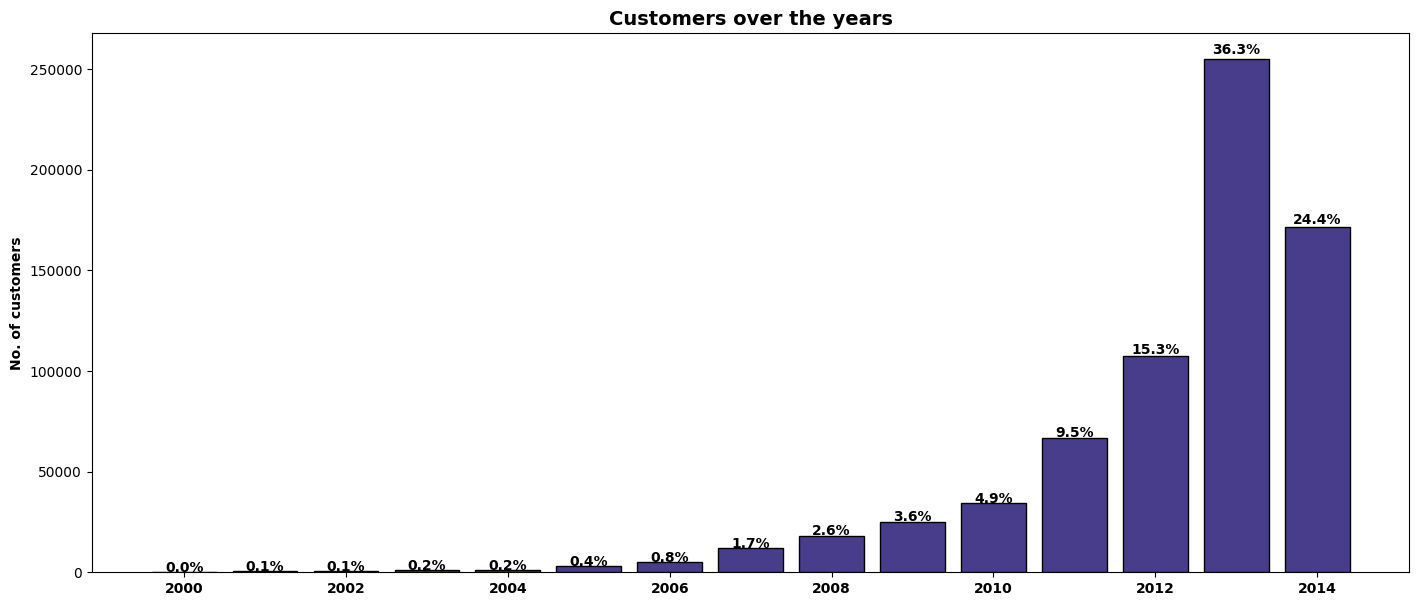

In [ ]:
# Count of customers every year
yr_cust=data.groupby('year')['reviewerID'].count()

# Bar chart
plt.figure(figsize=(17,7))
patches=plt.bar(x=yr_cust.index,height=yr_cust.values,color='darkslateblue',edgecolor='black')
annotations(patches,vert=True,percentage=True)
plt.ylabel('No. of customers',fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('Customers over the years',fontweight='bold',fontsize=14)
plt.show()

## Bivariate Analysis :

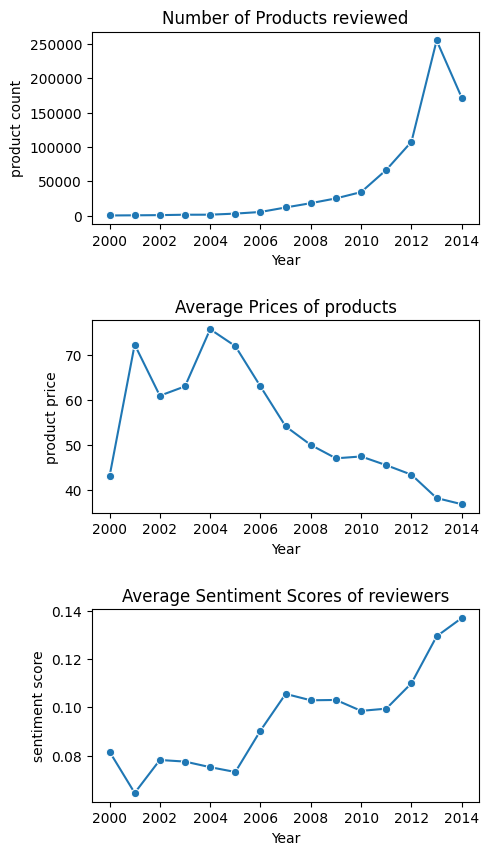

In [ ]:
# Year wise change in product price, count of products reviewed, and sentiment scores respectively
data['Year']=data['reviewTime'].dt.year

z=data.groupby('Year').aggregate({'asin':'count','price':'mean','polarity':'mean'})

plt.subplots(3,1,figsize=(5,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(311)
sns.lineplot(data=z,y='asin',x=z.index,marker='o')
plt.ylabel('product count')
plt.title('Number of Products reviewed')
plt.subplot(312)
sns.lineplot(data=z,y='price',x=z.index,marker='o')
plt.title('Average Prices of products')
plt.ylabel('product price')
plt.subplot(313)
sns.lineplot(data=z,y='polarity',x=z.index,marker='o')
plt.title('Average Sentiment Scores of reviewers')
plt.ylabel('sentiment score')
plt.show()